In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [21]:
df = pd.read_csv('2003_2017_waste.csv')
df.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [22]:
df.columns

Index(['waste_type', 'waste_disposed_of_tonne', 'total_waste_recycled_tonne',
       'total_waste_generated_tonne', 'recycling_rate', 'year'],
      dtype='object')

In [23]:
df['waste_type'].unique()

array(['Food', 'Paper/Cardboard', 'Plastics', 'C&D',
       'Horticultural waste', 'Wood', 'Ferrous metal',
       'Non-ferrous metal', 'Used slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap tyres',
       'Others (stones, ceramics & rubber etc.)', 'Total',
       'Others (stones, ceramics & rubber etc)', 'Food waste',
       'Construction Debris', 'Wood/Timber', 'Horticultural Waste',
       'Ferrous Metal', 'Non-ferrous Metals', 'Used Slag', 'Sludge',
       'Scrap Tyres', 'Ferrous Metals', 'Others', 'Construction debris',
       'Non-ferrous metals', 'Ash and sludge', 'Plastic',
       'Others (stones, ceramic, rubber, etc.)'], dtype=object)

In [24]:
df['waste_type'].nunique()

32

# Task 1 : Data Cleaning and Preparation

In [25]:
def normalize_waste(row):
    waste_types = df['waste_type'].unique()
    food = {'Food', 'Food Waste', 'Foodwaste', 'Food waste'}
    plastic = {'Plastic', 'Plastics'}
    horticultural = {'Horticultural Waste', 'Horticulture waste', 'Horticultural waste'}
    other = {'Others (stones, ceramics & rubber etc.)', 'Others (stones, ceramics & rubber etc)', 'Others', 'Others (stones, ceramic, rubber, etc.)'}
    ferrous_metal = {'Ferrous metal', 'Ferrous Metal', 'Ferrous Metals'}
    non_ferrous_metal = {'Non-ferrous metal', 'Non-ferrous Metals', 'Non-ferrous metals'}
    ash_and_sludge = {'Ash & Sludge', 'Ash and sludge', 'Sludge'}
    construction = {'Construction debris', 'Construction Debris'}
    slag = {'Used slag', 'Used Slag', }
    wood = {'Wood', 'Wood/Timber'}
    scrap_tyres = {'Scrap tyres', 'Scrap Tyres'}
    if row['waste_type'] in food:
        return 'Food Waste'
    elif row['waste_type'] in plastic:
        return 'Plastic'
    elif row['waste_type'] in horticultural:
        return 'Horticultural Waste'
    elif row['waste_type'] in other:
        return 'Others'
    elif row['waste_type'] in ferrous_metal:
        return 'Ferrous Metal'
    elif row['waste_type'] in non_ferrous_metal:
        return 'Non-ferrous Metal'
    elif row['waste_type'] in ash_and_sludge:
        return 'Ash & Sludge'
    elif row['waste_type'] in slag:
        return 'Used Slag'
    elif row['waste_type'] in wood:
        return 'Wood'
    elif row['waste_type'] in scrap_tyres:
        return 'Scrap Tyres'
    elif row['waste_type'] in construction:
        return 'Construction Debris'
    elif row['waste_type'] == 'Total':
        return np.nan
    else:
        return row['waste_type']    

In [28]:
df['waste_type'] = df.apply(normalize_waste, axis=1)

In [29]:
df['waste_type'].nunique()

15

In [30]:
df['waste_type'].unique()

array(['Food Waste', 'Paper/Cardboard', 'Plastic', 'C&D',
       'Horticultural Waste', 'Wood', 'Ferrous Metal',
       'Non-ferrous Metal', 'Used Slag', 'Ash & Sludge', 'Glass',
       'Textile/Leather', 'Scrap Tyres', 'Others', nan,
       'Construction Debris'], dtype=object)

In [31]:
df.isna().sum()

waste_type                     15
waste_disposed_of_tonne         0
total_waste_recycled_tonne      0
total_waste_generated_tonne     0
recycling_rate                  0
year                            0
dtype: int64

In [32]:
df.dropna(inplace=True)

# Task 2: Trend Analysis

### 2.1 Annual Waste Generation

In [33]:
df[['total_waste_generated_tonne','year']].groupby('year').sum()

,total_waste_generated_tonne
year,
2003,4728200
2004,4789700
2005,5018200
2006,5220500
2007,5600800
2008,5970200
2009,6114100
2010,6517000
2011,6898300


### 2.2 Top 3 Waste Types by Generation (2017)

In [34]:
waste2017 = df[df['year'] == 2017]
waste2017 = waste2017[['waste_type', 'total_waste_generated_tonne']].groupby('waste_type').sum().reset_index()
waste2017.sort_values(by='total_waste_generated_tonne', ascending=False)[:3]

,waste_type,total_waste_generated_tonne
1,Construction Debris,1609300
2,Ferrous Metal,1378800
8,Paper/Cardboard,1144800


# Task 3: Recycling Performance

### 3.1 Average Recycling Rate by Waste Type (2003–2017):

In [35]:
df_2003_2017 = df.query('year >= 2003 and year <= 2017')
avg_recycling = df_2003_2017[['waste_type', 'recycling_rate']].groupby('waste_type').mean()
avg_recycling.sort_values(by='recycling_rate', ascending=False)

,recycling_rate
waste_type,
C&D,0.990000
Construction Debris,0.973333
Used Slag,0.959333
Ferrous Metal,0.945333
Non-ferrous Metal,0.854000
Scrap Tyres,0.799333
Wood,0.610667
Paper/Cardboard,0.506000
Horticultural Waste,0.488000


Best recycled waste type: C&D \
Worst recycled waste type: Others

# Task 4: Visualization (Bonus)

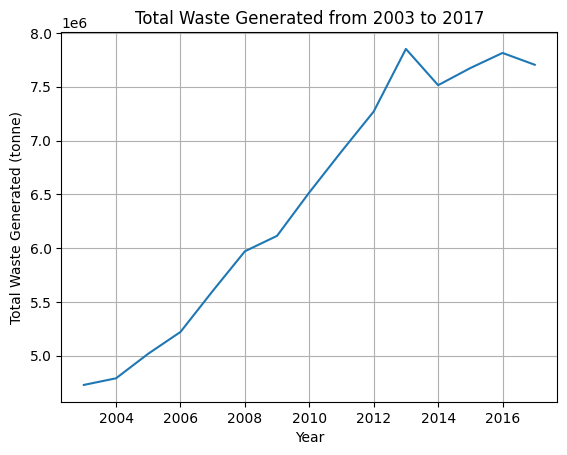

In [36]:
df_2003_2017.groupby('year').sum()['total_waste_generated_tonne'].plot()
plt.xlabel('Year')
plt.ylabel('Total Waste Generated (tonne)')
plt.title('Total Waste Generated from 2003 to 2017')
plt.grid()
plt.show()

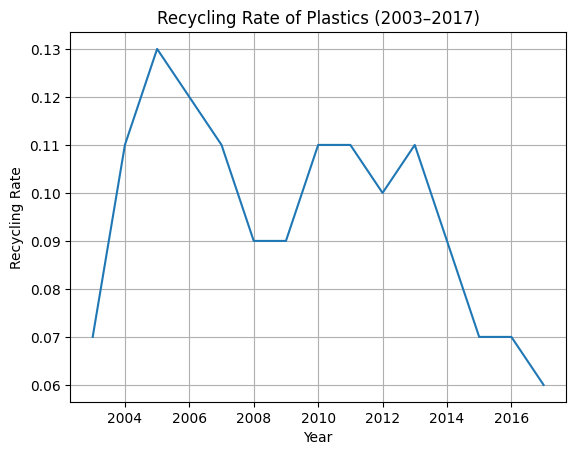

In [37]:
plastics_waste = df_2003_2017[df_2003_2017['waste_type'] == 'Plastic']
plastics_waste = plastics_waste[['year', 'recycling_rate']].groupby('year').mean().reset_index()
plt.plot(plastics_waste['year'], plastics_waste['recycling_rate'])
plt.xlabel('Year')
plt.ylabel('Recycling Rate')
plt.grid()
plt.title('Recycling Rate of Plastics (2003–2017)')
plt.show()